In [157]:
import numpy as np
import pandas as pd 
import statsmodels.api as sm
import statsmodels.formula.api as smf
import seaborn as sns
from sklearn.preprocessing import scale 
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report
from sklearn.metrics import roc_auc_score,roc_curve
from sklearn.metrics import mean_squared_error, r2_score
import statsmodels.formula.api as smf
import matplotlib.pyplot as plt
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.linear_model import LogisticRegression
from sklearn.linear_model import LinearRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn import tree
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import GradientBoostingClassifier


from warnings import filterwarnings
filterwarnings('ignore')

In [184]:
hmelq = pd.read_csv("hmelq.csv")
df = hmelq.copy()
df = df.dropna()
df.head()

,bad,loan,mortdue,value,reason,job,yoj,derog,delinq,clage,ninq,clno,debtinc
153,0,18200,94727.0,136877.0,DebtCon,Mgr,15.0,0.0,0.0,168.96,2.0,26.0,36.056
154,0,21700,79240.0,96784.0,DebtCon,Mgr,5.0,0.0,0.0,64.51,6.0,24.0,38.079
155,0,34100,241931.0,36486.0,DebtCon,Mgr,1.0,0.0,2.0,196.01,3.0,50.0,42.459
156,0,8400,62989.0,76718.0,HomeImp,Mgr,3.0,0.0,2.0,131.47,0.0,22.0,29.200
157,0,17400,25859.0,43684.0,DebtCon,Mgr,16.0,1.0,0.0,95.36,1.0,17.0,27.108


In [185]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2018 entries, 153 to 3549
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   bad      2018 non-null   int64  
 1   loan     2018 non-null   int64  
 2   mortdue  2018 non-null   float64
 3   value    2018 non-null   float64
 4   reason   2018 non-null   object 
 5   job      2018 non-null   object 
 6   yoj      2018 non-null   float64
 7   derog    2018 non-null   float64
 8   delinq   2018 non-null   float64
 9   clage    2018 non-null   float64
 10  ninq     2018 non-null   float64
 11  clno     2018 non-null   float64
 12  debtinc  2018 non-null   float64
dtypes: float64(9), int64(2), object(2)
memory usage: 220.7+ KB


In [186]:
df['bad'].value_counts()

0    1840
1     178
Name: bad, dtype: int64

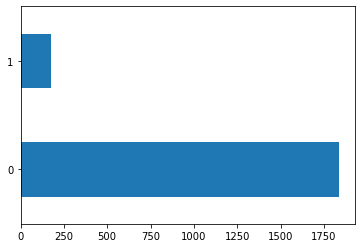

In [187]:
df['bad'].value_counts().plot.barh();

In [188]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
bad,2018.0,0.088206,0.283665,0.00,0.0000,0.000,0.0000,1.000
loan,2018.0,19010.257681,10768.607345,1700.00,12000.0000,16900.000,23600.0000,89900.000
mortdue,2018.0,76337.035183,44476.368189,5076.00,49577.2500,67595.000,92922.7500,399412.000
value,2018.0,106899.244797,54026.707096,23031.00,71287.2500,94514.000,121220.7500,512650.000
yoj,2018.0,9.003964,7.573012,0.00,3.0000,7.000,13.0000,41.000
derog,2018.0,0.150149,0.580421,0.00,0.0000,0.000,0.0000,10.000
delinq,2018.0,0.264123,0.789816,0.00,0.0000,0.000,0.0000,10.000
clage,2018.0,180.645020,84.420116,0.49,118.2050,176.670,229.6925,1168.230
ninq,2018.0,1.037661,1.578414,0.00,0.0000,0.000,2.0000,13.000
clno,2018.0,22.265114,9.457238,0.00,16.0000,21.000,27.0000,64.000


In [189]:
y = df['bad']
X = df.drop(['bad', 'reason', 'job'], axis=1)

In [190]:
loj = sm.Logit(y.astype(float), X.astype(float))
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.261768
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2008
Method:                           MLE   Df Model:                            9
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        18:17:39   Log-Likelihood:                -528.25
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 2.621e-27
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -2.706e-05   1.04e-05     -2.600      0.009   -4.74e-05   -6.66e-06
mortdue    -3.409e-07   5.22e-06     -0.065      0.948   -1.06e-05     9.9e-06
value      -3.173e-06   4.29e-06     -0.739      0.460   -1.16e-05    5.24e-06
yoj           -0.0342      0.013     -2.727      0.006      -0.059      -0.010
derog          0.5800      0.122      4.758      0.000       0.341       0.819
delinq         0.7398      0.086      8.610      0.000       0.571       0.908
clage         -0.0084      0.001     -6.358      0.000      -0.011      -0.006
ninq           0.0266      0.047      0.571      0.568      -0.065       0.118
clno          -0.0505      0.011     -4.635      0.000      -0.072      -0.029
debtinc        0.0222      0.007      3.126      0.002       0.008       0.036
==============================================================================
"""

In [191]:
y = df['bad']
X = df.drop(['bad', 'reason', 'job', 'mortdue'], axis=1)

In [192]:
loj = sm.Logit(y.astype(float), X.astype(float))
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.261769
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2009
Method:                           MLE   Df Model:                            8
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.1227
Time:                        18:17:50   Log-Likelihood:                -528.25
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 5.884e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -2.691e-05   1.01e-05     -2.654      0.008   -4.68e-05   -7.04e-06
value      -3.405e-06   2.39e-06     -1.423      0.155    -8.1e-06    1.29e-06
yoj           -0.0341      0.012     -2.734      0.006      -0.059      -0.010
derog          0.5803      0.122      4.764      0.000       0.342       0.819
delinq         0.7402      0.086      8.648      0.000       0.572       0.908
clage         -0.0084      0.001     -6.375      0.000      -0.011      -0.006
ninq           0.0265      0.047      0.570      0.569      -0.065       0.118
clno          -0.0507      0.011     -4.826      0.000      -0.071      -0.030
debtinc        0.0222      0.007      3.144      0.002       0.008       0.036
==============================================================================
"""

In [193]:
y = df['bad']
X = df.drop(['bad', 'reason', 'job', 'mortdue','ninq'], axis=1)

In [194]:
loj = sm.Logit(y.astype(float), X.astype(float))
loj_model = loj.fit()
loj_model.summary()

Optimization terminated successfully.
         Current function value: 0.261849
         Iterations 7


<class 'statsmodels.iolib.summary.Summary'>
"""
                           Logit Regression Results                           
==============================================================================
Dep. Variable:                    bad   No. Observations:                 2018
Model:                          Logit   Df Residuals:                     2010
Method:                           MLE   Df Model:                            7
Date:                Thu, 06 Aug 2020   Pseudo R-squ.:                  0.1224
Time:                        18:19:13   Log-Likelihood:                -528.41
converged:                       True   LL-Null:                       -602.11
Covariance Type:            nonrobust   LLR p-value:                 1.434e-28
==============================================================================
                 coef    std err          z      P>|z|      [0.025      0.975]
------------------------------------------------------------------------------
loan       -2.657e-05   1.01e-05     -2.631      0.009   -4.64e-05   -6.78e-06
value       -3.46e-06   2.39e-06     -1.448      0.148   -8.14e-06    1.22e-06
yoj           -0.0341      0.012     -2.737      0.006      -0.059      -0.010
derog          0.5921      0.120      4.943      0.000       0.357       0.827
delinq         0.7394      0.085      8.656      0.000       0.572       0.907
clage         -0.0085      0.001     -6.478      0.000      -0.011      -0.006
clno          -0.0503      0.010     -4.807      0.000      -0.071      -0.030
debtinc        0.0230      0.007      3.367      0.001       0.010       0.036
==============================================================================
"""

In [195]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X,y)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [196]:
y_pred = loj_model.predict(X)

In [197]:
confusion_matrix(y, y_pred)

array([[1834,    6],
       [ 175,    3]], dtype=int64)

In [198]:
accuracy_score(y, y_pred)

0.9103072348860257

In [24]:
print(classification_report(y, y_pred))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95      1840
           1       0.00      0.00      0.00       178

    accuracy                           0.91      2018
   macro avg       0.46      0.50      0.48      2018
weighted avg       0.83      0.91      0.87      2018



In [202]:
loj_model.predict(X)[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0], dtype=int64)

In [203]:
loj_model.predict_proba(X)[0:10][:,0:2]


array([[0.94370331, 0.05629669],
       [0.81222381, 0.18777619],
       [0.95136974, 0.04863026],
       [0.83164303, 0.16835697],
       [0.83387435, 0.16612565],
       [0.97991904, 0.02008096],
       [0.84978998, 0.15021002],
       [0.96849456, 0.03150544],
       [0.75620069, 0.24379931],
       [0.96202149, 0.03797851]])

In [204]:
y_probs = loj_model.predict_proba(X)
y_probs = y_probs[:,1]

In [205]:
y_probs[0:10]

array([0.05629669, 0.18777619, 0.04863026, 0.16835697, 0.16612565,
       0.02008096, 0.15021002, 0.03150544, 0.24379931, 0.03797851])

In [218]:
y_pred = [1 if i > 0.3 else 0 for i in y_probs]

In [219]:
y_pred[0:10]

[0, 0, 0, 0, 0, 0, 0, 0, 0, 0]

In [220]:
confusion_matrix(y, y_pred)

array([[1796,   44],
       [ 151,   27]], dtype=int64)

In [221]:
accuracy_score(y, y_pred)

#yeni accuracy değerine bakmak için

0.9033696729435085

In [222]:
print(classification_report(y, y_pred))

#yeni sınıflandırma raporu

              precision    recall  f1-score   support

           0       0.92      0.98      0.95      1840
           1       0.38      0.15      0.22       178

    accuracy                           0.90      2018
   macro avg       0.65      0.56      0.58      2018
weighted avg       0.87      0.90      0.88      2018



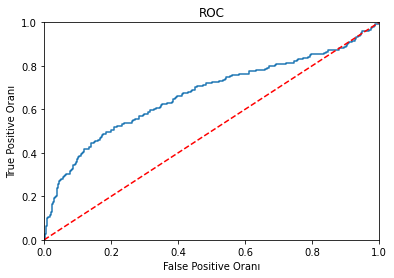

In [223]:
logit_roc_auc = roc_auc_score(y, loj_model.predict(X))

fpr, tpr, thresholds = roc_curve(y, loj_model.predict_proba(X)[:,1])

plt.figure()
plt.plot(fpr, tpr, label="AUC (area = %0.2f)" % logit_roc_auc)
plt.plot([0,1], [0,1], "r--")
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.xlabel('False Positive Oranı')
plt.ylabel('True Positive Oranı')
plt.title('ROC')
plt.show()

In [224]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2,
                                                   random_state = 42)

In [225]:
loj = LogisticRegression(solver = "liblinear")
loj_model = loj.fit(X_train, y_train)
loj_model

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='liblinear', tol=0.0001, verbose=0,
                   warm_start=False)

In [226]:
accuracy_score(y_test, loj_model.predict(X_test))

0.9133663366336634

In [227]:
print(classification_report(y_test, loj_model.predict(X_test)))


              precision    recall  f1-score   support

           0       0.91      1.00      0.95       369
           1       0.00      0.00      0.00        35

    accuracy                           0.91       404
   macro avg       0.46      0.50      0.48       404
weighted avg       0.83      0.91      0.87       404



In [228]:
loj = LogisticRegression(solver = "newton-cg")
loj_model_newton = loj.fit(X_train, y_train)
loj_model_newton

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [229]:
accuracy_score(y_test, loj_model_newton.predict(X_test))

0.9257425742574258

In [230]:
print(classification_report(y_test, loj_model_newton.predict(X_test)))


              precision    recall  f1-score   support

           0       0.93      1.00      0.96       369
           1       0.86      0.17      0.29        35

    accuracy                           0.93       404
   macro avg       0.89      0.58      0.62       404
weighted avg       0.92      0.93      0.90       404



In [64]:
loj = LogisticRegression(solver = "saga")
loj_model_saga = loj.fit(X_train, y_train)
loj_model_saga

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='saga', tol=0.0001, verbose=0,
                   warm_start=False)

In [65]:
accuracy_score(y_test, loj_model_saga.predict(X_test))

0.9133663366336634

In [66]:
print(classification_report(y_test, loj_model_saga.predict(X_test)))

              precision    recall  f1-score   support

           0       0.91      1.00      0.95       369
           1       0.00      0.00      0.00        35

    accuracy                           0.91       404
   macro avg       0.46      0.50      0.48       404
weighted avg       0.83      0.91      0.87       404



In [67]:
cross_val_score(loj_model_saga, X_test, y_test, cv = 10).mean()

0.9134756097560978

In [56]:
cross_val_score(loj_model, X_test, y_test, cv = 10).mean()

0.9158536585365855

In [63]:
cross_val_score(loj_model_newton, X_test, y_test, cv = 10).mean()

0.9331097560975609

# PCA

In [232]:
finance = pd.read_excel("HW_Data_Set.xlsx")
df = finance.copy()
df = df.dropna()

In [233]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6167 entries, 0 to 6166
Columns: 136 entries, ind_5 to 90_target
dtypes: float64(88), int64(45), object(3)
memory usage: 6.4+ MB


In [234]:
df.select_dtypes(include=["int64"])

,ind_5,ind_6,ind_19,ind_20,ind_21,ind_22,ind_23,ind_40,ind_42,ind_43,...,ind_128,ind_130,ind_132,ind_134,ind_136,ind_217,ind_406,ind_407,ind_410,ind_418
0,19,17,2,15,13,1,56,3,-5,-22,...,-50,-83,-125,6,6,1,-44,-23,-27,-54
1,24,19,0,11,11,1,63,3,-6,-18,...,-54,-88,-130,5,6,1,-48,-16,-31,-60
2,30,24,5,15,9,-1,65,3,-4,-11,...,-54,-89,-132,5,3,1,-48,-10,-30,-60
3,37,30,11,18,8,0,68,3,-5,-10,...,-57,-92,-136,3,5,1,-51,-10,-30,-65
4,41,37,13,23,10,10,91,2,-18,-26,...,-74,-111,-156,20,21,2,-70,-24,-45,-86
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,27,31,13,31,19,-19,37,4,5,8,...,-31,-74,-38,-5,-6,0,-25,7,4,-40
6163,22,27,11,30,19,-19,36,4,0,4,...,-29,-73,-39,-8,0,0,-23,5,5,-41
6164,19,22,11,29,19,-13,44,4,-8,-6,...,-35,-81,-47,10,9,0,-30,-6,-3,-49
6165,19,19,9,27,18,-5,55,4,-9,-15,...,-43,-91,-59,11,12,0,-40,-17,-14,-61


In [235]:
df.replace('?', 0, inplace=True)
df

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,20_target,50_target,90_target
0,19,17,100.000000,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-49.6,-54,-152,-353,1.000000,0.498547,0.701906,15.135802,35.625252,36.997753
1,24,19,100.000000,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-55.6,-60,-158,-359,1.000000,0.537088,0.690833,15.143348,35.643013,37.016198
2,30,24,100.000000,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-58.4,-60,-160,-362,1.000000,0.615169,0.693040,15.146870,35.651301,-37.024805
3,37,30,100.000000,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-61.8,-65,-166,-367,1.000000,0.661517,0.673418,15.153283,0.000000,-37.040483
4,41,37,100.000000,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-79.8,-86,-186,-388,1.000000,0.747204,0.700522,-15.179065,-35.727079,-37.103503
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6162,27,31,57.142857,28.571429,28.571429,60.010531,32.362582,9.70,9.38,13.66,...,-28.2,-40,-11,-270,0.270270,0.840000,0.600846,14.673247,-34.536532,-35.867088
6163,22,27,50.000000,21.428571,28.571429,60.209998,32.914628,7.65,8.84,11.79,...,-28.6,-41,-12,-271,0.000000,0.737470,0.527673,14.673750,-34.537716,-35.868318
6164,19,22,42.857143,14.285714,28.571429,64.329611,43.550592,8.95,9.06,10.30,...,-37.2,-49,-21,-280,0.769231,0.632107,0.551759,-14.684566,-34.563173,-35.894755
6165,19,19,100.000000,7.142857,92.857143,69.027764,54.130755,13.55,10.36,10.55,...,-48.9,-61,-33,-292,1.000000,0.733010,0.591584,-14.699280,-34.597806,-35.930723


In [236]:
dms = pd.get_dummies(df[['ind_109']])
dms.head()

,ind_109_GREEN,ind_109_RED
0,1,0
1,1,0
2,1,0
3,1,0
4,1,0


In [237]:
y = df["90_target"]
X_ = df.drop(["90_target", "50_target", "20_target", "ind_109"], axis = 1).astype("float64")
X_.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_410,ind_412,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,-27.0,0.002371,2.0,-49.6,-54.0,-152.0,-353.0,1.0,0.498547,0.701906
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,-31.0,0.003074,0.8,-55.6,-60.0,-158.0,-359.0,1.0,0.537088,0.690833
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,-30.0,0.003561,2.7,-58.4,-60.0,-160.0,-362.0,1.0,0.615169,0.693040
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,-30.0,0.004366,0.9,-61.8,-65.0,-166.0,-367.0,1.0,0.661517,0.673418
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,-45.0,0.004198,0.1,-79.8,-86.0,-186.0,-388.0,1.0,0.747204,0.700522


In [238]:
X = pd.concat([X_, dms[["ind_109_GREEN", "ind_109_RED"]]], axis=1)
X.head()

,ind_5,ind_6,ind_8,ind_9,ind_10,ind_12,ind_13,ind_14,ind_15,ind_16,...,ind_414,ind_416,ind_418,ind_420,ind_422,ind_424,ind_426,ind_428,ind_109_GREEN,ind_109_RED
0,19.0,17.0,100.0,85.714286,14.285714,72.363515,60.808814,23.80,17.62,11.73,...,2.0,-49.6,-54.0,-152.0,-353.0,1.0,0.498547,0.701906,1,0
1,24.0,19.0,100.0,78.571429,21.428571,74.275883,64.366798,11.45,18.16,12.22,...,0.8,-55.6,-60.0,-158.0,-359.0,1.0,0.537088,0.690833,1,0
2,30.0,24.0,100.0,71.428571,28.571429,75.140402,65.915803,8.75,17.86,12.28,...,2.7,-58.4,-60.0,-160.0,-362.0,1.0,0.615169,0.693040,1,0
3,37.0,30.0,100.0,64.285714,35.714286,76.677846,68.584234,7.80,14.76,12.61,...,0.9,-61.8,-65.0,-166.0,-367.0,1.0,0.661517,0.673418,1,0
4,41.0,37.0,100.0,57.142857,42.857143,81.603007,76.455495,14.90,11.92,14.25,...,0.1,-79.8,-86.0,-186.0,-388.0,1.0,0.747204,0.700522,1,0


In [239]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25,
                                                   random_state=42)

In [240]:
training = df.copy()

In [241]:
from sklearn.decomposition import PCA
from sklearn.preprocessing import scale

pca = PCA()

In [242]:
X_reduced_train = pca.fit_transform(scale(X_train))


In [243]:
np.cumsum(np.round(pca.explained_variance_ratio_, decimals=4)*100)



array([36.45, 48.83, 54.89, 59.28, 62.37, 65.31, 67.98, 69.98, 71.86,
       73.51, 75.03, 76.41, 77.77, 79.04, 80.26, 81.38, 82.47, 83.4 ,
       84.24, 85.07, 85.87, 86.59, 87.28, 87.93, 88.54, 89.13, 89.69,
       90.2 , 90.7 , 91.17, 91.62, 92.04, 92.43, 92.81, 93.17, 93.51,
       93.83, 94.14, 94.44, 94.73, 95.01, 95.27, 95.52, 95.75, 95.97,
       96.19, 96.39, 96.59, 96.77, 96.94, 97.11, 97.27, 97.42, 97.56,
       97.69, 97.82, 97.94, 98.05, 98.15, 98.25, 98.34, 98.43, 98.52,
       98.6 , 98.68, 98.76, 98.83, 98.9 , 98.97, 99.03, 99.09, 99.15,
       99.2 , 99.25, 99.3 , 99.34, 99.38, 99.42, 99.46, 99.49, 99.52,
       99.55, 99.58, 99.61, 99.64, 99.67, 99.7 , 99.72, 99.74, 99.76,
       99.78, 99.8 , 99.82, 99.84, 99.85, 99.86, 99.87, 99.88, 99.89,
       99.9 , 99.91, 99.92, 99.93, 99.94, 99.95, 99.96, 99.96, 99.96,
       99.96, 99.96, 99.96, 99.96, 99.96, 99.96, 99.96, 99.96, 99.96,
       99.96, 99.96, 99.96, 99.96, 99.96, 99.96, 99.96, 99.96, 99.96,
       99.96, 99.96,

([<matplotlib.axis.XTick at 0x1760a903c88>,
 <a list of 134 Text major ticklabel objects>)

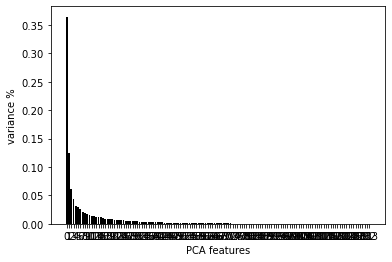

In [244]:
features = range(pca.n_components_)
plt.bar(features, pca.explained_variance_ratio_, color='black')
plt.xlabel('PCA features')
plt.ylabel('variance %')
plt.xticks(features)

In [245]:
def pca_fon(X, threshold):
    pca = PCA()
    X_pca = pca.fit_transform(scale(X))
    arr = np.cumsum(np.round(pca.explained_variance_ratio_, decimals = 4)*100)
    num_var = sum((arr < threshold*100)) + 1 
    print('pca sonrası değişken sayısı: ',num_var)
    X_pcad = pd.DataFrame(X_pca[:,0:num_var], index = X.index)
    return X_pcad

In [246]:
pca = PCA(n_components=8)
X_reduced_train = pca.fit_transform(scale(X_train))
lm = LinearRegression()
pcr_model = lm.fit(X_reduced_train, y_train)

In [247]:
pcr_model.intercept_

-3.284856445450811

In [248]:
pcr_model.coef_

array([-0.28065907,  0.4199937 ,  0.97561565,  1.24563825, -0.5902269 ,
       -0.60163048, -0.13860767,  0.31151751])

In [249]:
y_pred = pcr_model.predict(X_reduced_train)
y_pred[0:5]

array([ -3.56494814,  -5.18591934, -10.88240355,  -6.50270917,
        -7.75204655])

In [250]:
np.sqrt(mean_squared_error(y_train, y_pred))

36.497539085205496

In [251]:
r2_score(y_train, y_pred)

0.019743723003044944

Text(0, 0.5, 'PCA 2')

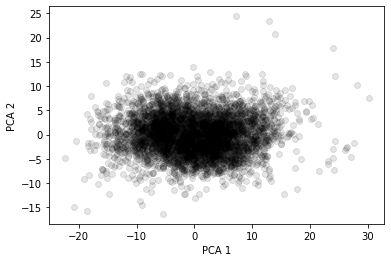

In [252]:
X_reduced_train = pca.fit_transform(scale(X_train))
PCA_components = pd.DataFrame(X_reduced_train)
plt.scatter(PCA_components[0] , PCA_components[1], alpha = .1 , color='black')
plt.xlabel('PCA 1')
plt.ylabel('PCA 2')

In [253]:
pca2 = PCA(n_components=15)
X_reduced_train = pca2.fit_transform(scale(X_train))
lm = LinearRegression()
pcr_model2 = lm.fit(X_reduced_train, y_train)

In [254]:
pcr_model2.intercept_

-3.2848564454508105

In [255]:
pcr_model2.coef_

array([-0.28065907,  0.41999349,  0.97561516,  1.24553469, -0.59094732,
       -0.60158496, -0.13792246,  0.30568088, -1.63900443, -2.16011894,
        1.16803101, -0.17277235, -1.10032069,  1.37417844,  0.58793031])

In [256]:
y_pred = pcr_model2.predict(X_reduced_train)
y_pred[0:5]

array([-3.86976003, -3.9564526 , -9.48385923, -6.29976926,  3.24964125])

In [257]:
np.sqrt(mean_squared_error(y_train, y_pred))

36.14069398604538

In [258]:
r2_score(y_train, y_pred)

0.038818412421218085